# K-Means Clustering

ismay different diffrent clutsers bunty hain 

ismay sirf x hota ha target column nea hota 

ya unsupervise machine learning ki example ha 

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=sns.load_dataset('titanic')  
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [53]:
# model 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler # For normalize the data 
# Import the data in feature columns 
X=df[['age','fare']]
# filled with mean value
X['age']=X['age'].fillna(X['age'].mean())
X['fare']=X['fare'].fillna(X['fare'].mean())

# Normalize the data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



C:\Users\Abdul-Samad\AppData\Local\Temp\ipykernel_18012\4107734951.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Abdul-Samad\AppData\Local\Temp\ipykernel_18012\4107734951.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [54]:
X.head()

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [55]:
X_scaled # in standard scaling from -3 to 3

array([[-0.5924806 , -0.50244517],
       [ 0.63878901,  0.78684529],
       [-0.2846632 , -0.48885426],
       ...,
       [ 0.        , -0.17626324],
       [-0.2846632 , -0.04438104],
       [ 0.17706291, -0.49237783]], shape=(891, 2))

In [56]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X_scaled)

#Assign Cluster Labels to the data 
df['cluster'] = kmeans.labels_
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,cluster
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,4
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,0
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,0


In [57]:
df["cluster"].value_counts()

cluster
0    466
4    166
2    141
1     98
3     20
Name: count, dtype: int64

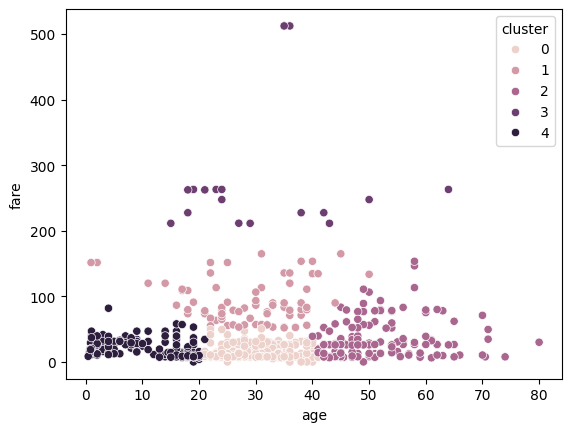

In [58]:
sns.scatterplot(x="age", y="fare", hue="cluster", data=df)
plt.show()

In [59]:
# show plots via plotly 
import plotly.express as px
fig = px.scatter(df, x="age", y="fare", color="cluster")
fig.show()

In [60]:
fig=px.scatter_3d(df,x="age",y="fare",z="pclass",color="cluster")
fig.show()

In [ ]:
# parallel_coordinates(df, "cluster")
fig=px.parallel_coordinates(df, color="cluster") # this is a Multi Dimensional plot
fig.show()